**Группы, выбранные для анализа комментариев**

https://vk.com/149941998 - Веганские Афины

https://vk.com/17228 - Вегетарианцы / веганы 

https://vk.com/true_meateater - True Meateater | Антивеган


Выгрузка всех постов со стены осуществлялась из JupyterLab по токену и id группы

In [ ]:
#Получение всех постов со стены сообщества Вконтакте на примере группы Вегетарианцы / веганы
#Вставить свой токен
access_token = 'ab3164ce74aa4d90205d25a000bdb9c14604e88155b99ea6384b416fe8a0d2e447da3b4c3376b434df6e2'
owner_id = '-17228'

import requests
import time 
import datetime
import csv
 
def getjson(url, data = None):
    response = requests.get(url, params = data)
    print(response.url, '\n')
    return response.json()
 
def get_all_posts (access_token, owner_id, count = 100, offset=0):
    all_posts = []
     
    while True:
        time.sleep(1)
        wall = getjson("https://api.vk.com/method/wall.get", {
            'owner_id' : owner_id, 
            'count' : count,
            'access_token' : access_token,
            'offset' : offset,
            'v' : '5.92'
            })
         
        count_posts = wall['response']['count']
        posts = wall['response']['items']
         
        all_posts.extend(posts)
         
        if len(all_posts) >= count_posts:
            break
        else:
            offset += 100
    return all_posts, count_posts
 
def make_posts(all_posts):
    filtered_data = []
    for post in all_posts:
         
        try:
            id = post['id']
        except:
            id = 0
             
        try:
            owner_id = str(post['owner_id'])[1:]
        except:
            owner_id = ''
             
        try:
            link = 'https://vk.com/wall-{owner_id}_{id}'.format(owner_id = owner_id, id = id)
        except:
            link = ''
             
        try:
            date = datetime.datetime.fromtimestamp(int(post['date'])).strftime('%d-%m-%Y')
        except:
            date = ''
         
        try:
            day = datetime.datetime.fromtimestamp(int(post['date'])).strftime('%d')
        except:
            day = ''
        try:
            month = datetime.datetime.fromtimestamp(int(post['date'])).strftime('%B')
        except:
            month = ''
             
        try:
            year = datetime.datetime.fromtimestamp(int(post['date'])).strftime('%Y')
        except:
            year = ''
 
        try:
            weekday = datetime.datetime.fromtimestamp(int(post['date'])).strftime('%A')
        except:
            weekday = ''
 
        try:
            time = datetime.datetime.fromtimestamp(int(post['date'])).strftime('%H')
        except:
            time = ''
             
             
        try:
            likes = post['likes']['count']
        except:
            likes = 0
             
        try:
            reposts = post['reposts']['count']
        except:
            reposts = 0
             
        try:
            comments = post['comments']['count']
        except:
            comments = 0
             
        try:
            views = post['views']['count']
        except:
            views = 0
             
        try:
            text = post['text']
        except:
            text = ''
         
        photos = []
        videos = []
        docs = []
         
        try:
            attachments = post['attachments']
             
            if attachments:
                 
                for att in attachments:
                    if att['type'] == 'video':
                        video_title = att['video']['title']
                        video_owner_id = str(att['video']['owner_id'])[1:]
                        video_id = att['video']['id']
                        video_url ='https://vk.com/video-{}_{}'.format(video_owner_id, video_id)
                        videos.append({video_title : video_url})
 
                    if att['type'] == 'photo':
                        photo_id = att['photo']['id']
                        photo_owner_id = str(att['photo']['owner_id'])[1:]
                        photo_url = 'https://vk.com/photo-{}_{}'.format(photo_owner_id, photo_id)
                        photos.append(photo_url)
                         
                    if att['type'] == 'doc':
                        doc_url = att['doc']['url']
                        doc_title = att['doc']['title']
                        docs.append({doc_title : doc_url})
 
        except:
            attachments = ''
             
        if len(photos) == 0:
            photos = ''
        if len(videos) == 0:
            videos = ''
        if len(docs) == 0:
            docs = ''
             
        filtered_post = {
                'id' : id,
                'date' : date,
                'year' : year,
                'month' : month,
                'day' : day,
                'weekday' : weekday,
                'time' : time,

                'likes' : likes,
                'reposts' : reposts,
                'comments' : comments,
                'views' : views, 
                'text' : str(text),
                'photos' : photos,
                'videos' : videos,
                'docs' : docs,
                'link' : link,
                'group_id' : owner_id,
                }
         
         
        filtered_data.append(filtered_post)
     
    return filtered_data
     
 
def write_csv(data, encoding = 'utf-8'):

    owner_id = data[0]['group_id']
    filename = '{owner_id}-{datetime}.csv'.format(owner_id = owner_id, datetime= str(datetime.datetime.now())[:10] )
    with open(filename, 'w', newline = '', encoding = encoding) as csvfile:
        fieldnames = ['id','date','year','month','day', 'weekday', 'time',
                      'likes', 'reposts', 'views', 'comments', 'text', 
                      'photos', 'videos', 'docs', 'link']
         
        writer = csv.DictWriter(csvfile, delimiter = ';', fieldnames = fieldnames, extrasaction = 'ignore')
        writer.writeheader()
        writer.writerows(data)
         
        print ('Data written to csv', filename)
    csvfile.close
 
all_posts, count_posts = get_all_posts (access_token, owner_id)
 
pposts = make_posts(all_posts)
 
write_csv(pposts)

#По итогу работы кода был выгружен файл с постами "17228-2021-11-20.csv"

Сохраненный файл 17228-2021-11-20.csv загружаем и читаем в Colab

In [ ]:
import pandas as pd
import numpy as np
import json
import requests
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving 17228-2021-11-20.csv to 17228-2021-11-20.csv


In [ ]:
df = pd.read_csv('17228-2021-11-20.csv', encoding = "utf-8", sep = ';')

In [ ]:
df.to_csv('all_posts.csv', sep = ';', index=False) #перезапись файла в привычный формат котировки. Далее работаем уже с ним

In [ ]:
df_1 = pd.read_csv('all_posts.csv', sep = ';')

In [ ]:
df_1.head(2)

,id,date,year,month,day,weekday,time,likes,reposts,views,comments,text,photos,videos,docs,link
0,406111,19-11-2021,2021,November,19,Friday,21,4,1,460,1,Чем грозит мясоедам дефицит овощей в рационе.,NaN,[{'Пробиотики и пребиотики — Дмитрий Алексеев ...,NaN,https://vk.com/wall-17228_406111
1,406103,19-11-2021,2021,November,19,Friday,16,21,6,889,3,Разговор - интервью с чудесной девочкой Алисой...,NaN,[{'Вегетарианка в 9 лет! Алиса ♥ ☼ ♥': 'https:...,NaN,https://vk.com/wall-17228_406103


In [ ]:
df_1.count() # всего количество постов в группе Вегетарианцы / веганы - 6433.

id          6433
date        6433
year        6433
month       6433
day         6433
weekday     6433
time        6433
likes       6433
reposts     6433
views       6433
comments    6433
text        5686
photos      4186
videos      1134
docs          98
link        6433
dtype: int64

Создание датасетов с самым большим кол-вом лайков и комментов

In [ ]:
df_likes = df.sort_values(by = 'likes').tail(50)
df_likes['comments'].sum()

4191

In [ ]:
df_comments = df.sort_values(by = 'comments').tail(50) #далее работаем уже с этими постами, где 18106 комментариев
df_comments['comments'].sum()

18106

In [ ]:
df_comments.tail(10)

,id,date,year,month,day,weekday,time,likes,reposts,views,comments,text,photos,videos,docs,link
3708,282089,12-07-2017,2017,July,12,Wednesday,21,422,27,11845,410,NaN,['https://vk.com/photo-17228_456242707'],NaN,NaN,https://vk.com/wall-17228_282089
5102,208215,30-03-2014,2014,March,30,Sunday,0,28,6,0,412,Этому человеку очень нужна ваша поддержка и мн...,NaN,NaN,NaN,https://vk.com/wall-17228_208215
4930,223916,09-01-2015,2015,January,9,Friday,1,569,110,0,421,Je suis charlie!\n\nВчерашний террористический...,"['https://vk.com/photo-17228_351761408', 'http...",NaN,NaN,https://vk.com/wall-17228_223916
2052,339359,25-05-2019,2019,May,25,Saturday,12,15,0,8259,482,"Скажите, почему я не должен есть мясо? Испокон...",NaN,NaN,NaN,https://vk.com/wall-17228_339359
2634,315956,05-11-2018,2018,November,5,Monday,19,329,40,13536,523,"Как-то я писала пост о том, какие люди мне неп...",['https://vk.com/photo-17228_456248235'],NaN,NaN,https://vk.com/wall-17228_315956
4165,261679,21-10-2016,2016,October,21,Friday,17,361,71,0,567,Почему люди едят трупы животных?\n\nБольшинств...,['https://vk.com/photo-17228_438054654'],NaN,NaN,https://vk.com/wall-17228_261679
4135,263752,11-11-2016,2016,November,11,Friday,18,291,45,0,572,Почему Санкт-Петербург считают самым веганским...,"['https://vk.com/photo-17228_456239050', 'http...",NaN,NaN,https://vk.com/wall-17228_263752
708,386502,06-07-2020,2020,July,6,Monday,22,380,33,12314,653,Многие люди выбирают кокосовое молоко вместо к...,['https://vk.com/photo-17228_457258021'],NaN,NaN,https://vk.com/wall-17228_386502
4701,233875,07-06-2015,2015,June,7,Sunday,19,422,75,0,653,"Этот теленочек родился прямо в машине, в котор...",['https://vk.com/photo-17228_368126365'],NaN,NaN,https://vk.com/wall-17228_233875
4171,260135,11-10-2016,2016,October,11,Tuesday,18,174,23,0,949,Обзор прессы: «вегетарианство уменьшает мозг»\...,['https://vk.com/photo-17228_436397589'],NaN,NaN,https://vk.com/wall-17228_260135


Сортировка по лайкам не очень показательна, т.к. многие ставят лайки под фото и в таких постах мало комментариев, что видно из датасета

In [ ]:
df_likes.tail()

,id,date,year,month,day,weekday,time,likes,reposts,views,comments,text,photos,videos,docs,link
5197,201310,09-01-2014,2014,January,9,Thursday,18,1616,255,0,23,#цитаты@vegetarians,['https://vk.com/photo-17228_320291644'],NaN,NaN,https://vk.com/wall-17228_201310
4784,230842,19-05-2015,2015,May,19,Tuesday,1,1905,324,0,16,#мех #шуба,"['https://vk.com/photo-17228_367829626', 'http...",NaN,NaN,https://vk.com/wall-17228_230842
3577,288952,03-11-2017,2017,November,3,Friday,20,2022,323,80820,9,#другие_земляне@vegetarians\nЖивотные любят об...,NaN,[{'Животные любят обниматься.': 'https://vk.co...,NaN,https://vk.com/wall-17228_288952
6247,59734,16-04-2012,2012,April,16,Monday,15,2352,524,0,38,"""Чтобы понять, есть ли у животных душа, нужно ...",['https://vk.com/photo-17228_283402839'],NaN,NaN,https://vk.com/wall-17228_59734
17,405505,03-11-2021,2021,November,3,Wednesday,18,2544,86,14702,57,Тем временем в Финляндии\n\nhttps://plus-one.r...,['https://vk.com/photo-17228_457262799'],NaN,NaN,https://vk.com/wall-17228_405505


Создание списка id постов с самым большим кол-ом лайков и комментариев

In [ ]:
text_ids = df_comments['id'].tolist() + df_likes['id'].tolist()
post_id = list(set(text_ids)) 
len(post_id)

95

смотрим сколько комментов в 50 самых репостных постах на стене

In [ ]:
df_reposts = df.sort_values(by = 'reposts').tail(50) 
df_reposts['comments'].sum()

3199

В дальнейшем решено анализировать только комментарии к самым комментируемым постам. Решение было принято исходя из дефицита времени. Для целей анализа было бы полезно разметить тональность также для комментариев к постам с самым большим количеством лайков и репостов.

Далее выгружаем все комментарии к 50 самым обсуждаемым темам. Выгрузка по токену и id поста из API Вк в среде JupyterLab

In [ ]:
import requests
import pandas as pd
import time
import json

params = {
    'owner_id': -17228,
    'post_id': 258228,
    'need_likes': 1,
    'access_token':'be8a51fb9a801bddfd0803d77cadbdd0cfac6fea0827205747fd839be5cee52963d39c5896f1d7a5dcf1a',
    'count':100,
    'offset':0,
    'v': '5.131'
}
comments_count=None
users=None

def get_profiles(params):
    req = requests.get('https://api.vk.com/method/wall.getComments?', params)
    data = req.content.decode()
    req.close()
    return data

js_obj = json.loads(get_profiles(params))

while True:#Цикл который выполняется всегда, до break
    print ('Новый запрос')#Для демонстрации кол-ва запросов
    js_obj = json.loads(get_profiles(params))#Распаковывает  json
    if js_obj.get('error'):
        print(js_obj.get('error'))
        time.sleep(1,1)#фунция засывает,чтобы не перегружать сервер.У vk есть ограничение на кол-во  обращений в 1 сек
        js_obj = json.loads(get_profiles(params))
    else:
        df = pd.json_normalize(js_obj) 
        if comments_count is None:
            comments_count = int(df['response.count']) #Узнаем общее число запросов
        comments_table = df.iat[0,1]
        if users is None:
            users = pd.json_normalize(comments_table)#Записываем таблицу
        else:
            users = users.append(pd.json_normalize(comments_table),ignore_index=True)
        params['offset'] = params['offset'] + params['count']#Добавляем параметр offset
        time.sleep(0.1)
        if params['offset'] >= comments_count:#Цикл завершается, когда offset больше или равно общему числу запросов
            print ('Запросы завершены')
            break  

users.head(2)

# Изначально планировалось делать привязку тональности к самому посту, но дефицит времени не позволил это реализовать
# Все файлы с комментариями сохранены в одну папку на диске.   Объединяем файлы с комментариями в один датафрейм

from pathlib import Path
import fileinput
import glob
import sys
import os


os.chdir("filename/")
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
combined_csv = pd.concat([pd.read_csv(f, sep=';') for f in all_filenames])
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig', sep=';')

# удаляем ненужные столбцы
Comments_df = combined_csv.drop(['parents_stack', 'likes.can_like', 'likes.user_likes', 'thread.count', 'thread.items', 
                                 'thread.can_post', 'thread.show_reply_button', 'thread.groups_can_post', 'deleted'], axis=1)

Comments_df.to_csv( "Comments_df.csv", index=False, sep=';') # записываем все комментарии в один файл.


Выгрузку по данному шаблону производим отдельно по каждой группе.
Комментарии групп Вегетарианцы / Веганы и Антивеган импортируются в Excel и размечаются вручную по тональности. Далее на их основе в Excel строятся диаграммы тональности по аргументам
Комментарии группы Веганские Афины используются для обнаружения наиболее часто употребляемых слов для оценки общего настроения группы (выводится облако слов). И вручную размечаются по частоте упоминаний локаций и магазинов (продавцов веганских продуктов). На основе ручной разметки строится облако слов.

Частотный анализ комментариев группы Веганские Афины (Томск)

In [ ]:
import pandas as pd
import os
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving Comments_2.csv to Comments_2.csv


In [ ]:
df = pd.read_csv('Comments_2.csv', sep = ";")

In [ ]:
df=df.astype(str)

In [ ]:
df

,id,from_id,date,text,post_id,owner_id,likes.count,attachments
0,5923,123314878,1593768971,Книжки нашли хозяек 🤗,5922,-149941998,0,nan
1,5929,42099964,1594114984,"Ни разу не видел, но мне вроде на днях должен ...",5928,-149941998,1,nan
2,5934,123314878,1594365613,"Мне кажется, что в Томске такого нет, ни разу ...",5928,-149941998,1,nan
3,5935,120644304,1594366098,Спасибо! 🌸,5932,-149941998,1,nan
4,5940,57048230,1595331954,А как вода может быть не по вегану? 😳,5939,-149941998,0,nan
...,...,...,...,...,...,...,...,...
319,6838,134419031,1635068628,Нафиг сахар суют только не пойму,6832,-149941998,7,nan
320,6839,172082069,1635233228,Всем рекомендую :) отличная шавуха была. И вся...,6834,-149941998,1,nan
321,6840,169862890,1635238257,Благодарим за такие теплые слова! Будем старат...,6834,-149941998,0,nan
322,6841,57537266,1635341897,Попробовал найти вас в Яндекс.еда и не вижу,6834,-149941998,0,nan


In [ ]:
df = df.rename(columns={'text': 'message'})
text = df['message']
text

0                                  Книжки нашли хозяек 🤗
1      Ни разу не видел, но мне вроде на днях должен ...
2      Мне кажется, что в Томске такого нет, ни разу ...
3                                             Спасибо! 🌸
4                  А как вода может быть не по вегану? 😳
                             ...                        
319                     Нафиг сахар суют только не пойму
320    Всем рекомендую :) отличная шавуха была. И вся...
321    Благодарим за такие теплые слова! Будем старат...
322          Попробовал найти вас в Яндекс.еда и не вижу
323             Сейчас тоже заказали, будем пробовать :)
Name: message, Length: 324, dtype: object

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk # Библиотека для работы с текстами
from nltk.tokenize import word_tokenize, sent_tokenize # токенайзер - разбивает непрерывный текст на токены(слова)
from nltk.stem.snowball import SnowballStemmer # стеммер - преобразует тексты к начальной форме
from nltk.corpus import stopwords # список незначимых слов - я, ты, он, она, там и тд
import string


nltk.download('all') # Подгрузка необходимых данных для работы работы nltk 
nltk.download('punkt')
nltk.download('stopwords')

!pip install pymorphy2
import pymorphy2

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

In [ ]:
import string
string.punctuation
import re

In [ ]:
import pandas as pd
from nltk.stem.snowball import SnowballStemmer 
from nltk.tokenize import word_tokenize, sent_tokenize 
import nltk
from nltk.corpus import stopwords

nltk.download('all')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

True

In [ ]:
stemmer_ru = SnowballStemmer("russian") 

def stemm_text(text, stemmer):
    """принимает на вход текст и def stemm_text(text, stemmer): возвращает леммы токенов текста """
    tokens = [stemmer.stem(word) for word in word_tokenize(text.lower())]
    tokens = ' '.join(tokens)
    return tokens
df['stemmed_name'] = df['message'].apply(lambda x: stemm_text(x, stemmer_ru))
df['stemmed_name']

0                                    книжк нашл хозяек 🤗
1      ни раз не видел , но мне врод на днях долж при...
2      мне кажет , что в томск так нет , ни раз не ви...
3                                             спасиб ! 🌸
4                    а как вод может быт не по веган ? 😳
                             ...                        
319                       нафиг сахар суют тольк не пойм
320    всем рекоменд : ) отличн шавух был . и всяк за...
321    благодар за так тепл слов ! буд стара и дальш ...
322              попробова найт вас в яндекс.ед и не виж
323                  сейчас тож заказа , буд пробова : )
Name: stemmed_name, Length: 324, dtype: object

In [ ]:
morph_analyzer = pymorphy2.MorphAnalyzer() # Создаем объект стеммера
ru_stop_words = set(stopwords.words('russian')+['шт']+['р']+['ещ']+['сс']+['очень']+['это']+['брать']+['видеть']+['вместо']+['то']+['быть']+['т']+['``']+['1']+['1шт']+['ещё']+['https']+['2']+['200р']+['nan']+['весь']+['170р']+['мочь']+['всё']+['точно']+['вообще']+['вроде']+['быть']) # Подгружаем список стоп слов из модуля stopwords библиотеки nltk 
punctuations = list(string.punctuation)

def text_processing(text, morph_analyzer, stop_words, punct):
    """принимает на вход предложение и возвращает леммы токенов предложения, фильтруя по стоп словам и удаляя знаки пунктуации"""
    words = word_tokenize(text.lower()) # С помощью токенизации разбиваем текст на токены 
    words = [word for word in words if word not in stop_words] # Удаляем стопслова
    words = [word for word in words if word not in punct] # Удаляем знаки пунктуации
    words = [morph_analyzer.parse(word)[0].normalized.word for word in words] # лемматизируем каждое слово
    words = ' '.join(words)

    return words

# генерируем колонку lemmatized_text
df['lemmatized_text'] = df['message'].apply(lambda x: text_processing(x, morph_analyzer, ru_stop_words, punctuations)) # с помощью метода apply прогоняем значения колонки text через нашу функцию обработки text_processing
df.head()

,id,from_id,date,message,post_id,owner_id,likes.count,attachments,stemmed_name,lemmatized_text
0,5923,123314878,1593768971,Книжки нашли хозяек 🤗,5922,-149941998,0,nan,книжк нашл хозяек 🤗,книжка наслать хозяйка 🤗
1,5929,42099964,1594114984,"Ни разу не видел, но мне вроде на днях должен ...",5928,-149941998,1,nan,"ни раз не видел , но мне врод на днях долж при...",раз видеть день должный прийти темп стартер eb...
2,5934,123314878,1594365613,"Мне кажется, что в Томске такого нет, ни разу ...",5928,-149941998,1,nan,"мне кажет , что в томск так нет , ни раз не ви...",казаться томск такой раз видеть эдик делать со...
3,5935,120644304,1594366098,Спасибо! 🌸,5932,-149941998,1,nan,спасиб ! 🌸,спасибо 🌸
4,5940,57048230,1595331954,А как вода может быть не по вегану? 😳,5939,-149941998,0,nan,а как вод может быт не по веган ? 😳,вода вегана 😳


In [ ]:
#Функция для очистки текста от "мусора"
def remove(text):
    text= text.lower() # приводим все слова к нижнему регистру
    text = re.sub(r"[^а-яА-Я ]", " ", text) # удаляем все символы кроме букв кириллицы
    return text #возвращает обработанный код

In [ ]:
df['lemmatized_text'] = df.apply(lambda row: remove(row.lemmatized_text), axis=1) # мусор

In [ ]:
df['lemmatized_text']

0                               книжка наслать хозяйка  
1      раз видеть день должный прийти темп стартер   ...
2      казаться томск такой раз видеть эдик делать со...
3                                              спасибо  
4                                          вода вегана  
                             ...                        
319                            нафиг сахар совать понять
320    весь рекомендовать отличный шавуха всякий замо...
321    благодарить такой т плый слово быть стараться ...
322                   попробовать найти яндекс ед видеть
323                              заказать быть пробовать
Name: lemmatized_text, Length: 324, dtype: object

In [ ]:
def get_word_counts(texts):
    wordfreq = {}

    for sentence in texts:
        
        for word in word_tokenize(sentence):
            
            if word not in wordfreq:
                wordfreq[word] = 0 
            wordfreq[word] += 1
        
    return {k:v for k,v in sorted(wordfreq.items(), key=lambda kv: kv[1], reverse=True)}

In [ ]:
most_common_words=get_word_counts(df['lemmatized_text'])
most_common_words_1=pd.Series(most_common_words)
most_common_words_1

р            29
вкусный      20
митл         20
сс           20
веганский    18
             ..
кий           1
радовать      1
вас           1
яндекс        1
ед            1
Length: 1182, dtype: int64

(-0.5, 399.5, 199.5, -0.5)

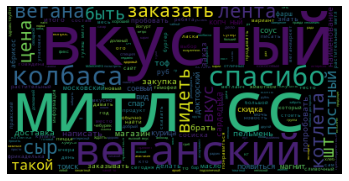

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


text = ' '.join(df['lemmatized_text'])
 
# Генерируем облако слов и сохраняем в переменной cloud
cloud = WordCloud().generate(text)
# Выводим облако слов на экран
plt.imshow(cloud)
# Отключаем отображение осей
plt.axis('off')